<a href="https://colab.research.google.com/github/emadazad/beer_challenge/blob/master/beer_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing the Data

First, the data is read, and null values are taken care of. One easy way is to through away all the rows with NaN values but here we take the hard way and try to fill them with a clever ideas. Also, the search for duplicate values and unreasonable entries is explained in each section. Feel free to skip the Brewery and Beer info if this chapter is too long. 


In [ ]:
# reading the csv file into a pandas dataframe
df = pd.read_csv('/content/beer_reviews.csv')
# printing data info, it turns out the column names don't have any spaces
print(df.info())
# previewing 5 samples
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB
None


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [ ]:
# Checking for nan values
for head in df.columns:
  if df[head].isnull().values.any():
    print('%s has %d NaN value(s).' % (head, df[head].isnull().values.sum()))

brewery_name has 15 NaN value(s).
review_profilename has 348 NaN value(s).
beer_abv has 67785 NaN value(s).


It seems that three columns have missing data, so for each, we have to come up with a way to replace them with real data. 


1.   For the profile_name, we can simply replace them with "unknown", but we have to be careful that "unknown" is not a person's profile name.


In [ ]:
# Checking for Unknown username and replace the Nan values for profilename
print('Is unknown in profile names?', ('unknown' in df.review_profilename.unique()))
print('So, replace unknown with NaN values in data')
df.review_profilename = df.review_profilename.fillna('unknown')

Is unknown in profile names? False
So, replace unknown with NaN values in data


2.   For brewery_name, there are only 2 ids who don't have a name, so we will call them no_name1 and no_name2, respectively. That is,


*   1193 -> no_name1
*   27 -> no_name2



In [ ]:
# Finding the ids with no name
print('ids with no name:', df[df.brewery_name.isna()].brewery_id.unique())
# Filling the missing data with no_name1 and 2
df.brewery_name[df.brewery_id == 1193] = df.brewery_name[df.brewery_id == 1193].fillna('no_name1') 
df.brewery_name[df.brewery_id == 27] = df.brewery_name[df.brewery_id == 27].fillna('no_name2')

ids with no name: [1193   27]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


3.   Things get more serious for beer_abv. There are better ways to fill in these missing values, but for the sake of this notebook and considering question 1, the average ABV of a company is replaced by the null values.
Also, for companies that have not published their beer_abv, the average of all the ABVs is replaced.

In [ ]:
####### WARNING: This might take 30-120 seconds ####### 
# because the only Nan values are in the beer_abv column, 
# we can use df without .beer_abv
df.fillna(df.groupby('brewery_name').transform('mean'), inplace=True)
# replace the rest with average abv
df.fillna(df.beer_abv.mean(), inplace=True)
# Do we have NaN values?
if df.isnull().any().sum() == 0:
  print('Congratulations! No more NaN values.')

Congratulations! No more NaN values.


In [ ]:
# Scale checking
# finding out what are the scale of some columns
print('range value of review_overall:', 
      (df['review_overall'].min() , df['review_overall'].max())) 
print('range value of review_aroma:', 
      (df['review_aroma'].min() , df['review_aroma'].max())) 
print('range value of review_appearance:', 
      (df['review_appearance'].min() , df['review_appearance'].max())) 
print('range value of review_palate:', 
      (df['review_palate'].min() , df['review_palate'].max())) 
print('range value of review_taste:', 
      (df['review_taste'].min() , df['review_taste'].max())) 
print('range value of beer_abv:', 
      (df['beer_abv'].min() , df['beer_abv'].max())) 
# The review range are between 0 and 5 and the beer_abv fall into (0,58) 

range value of review_overall: (0.0, 5.0)
range value of review_aroma: (1.0, 5.0)
range value of review_appearance: (0.0, 5.0)
range value of review_palate: (1.0, 5.0)
range value of review_taste: (1.0, 5.0)
range value of beer_abv: (0.01, 57.7)


## Brewery info



Here we learn more about each brewery. It seems like some brewery names have more than one id associate with them. 
By the assumption that these are different branches of a brewery, we make decisions based on names.

In [ ]:
# Check to see if we have duplicate names, ids or misspelling for breweries
if df['brewery_name'].nunique() > df['brewery_id'].nunique():
  print('Some of the brewery names are missppelled!') 
elif df['brewery_name'].nunique() < df['brewery_id'].nunique():
  print('Duplicated ids for some brewery names!')
else:
  print("Success!")

Duplicated ids for some brewery names!


In [ ]:
print('There are %d unique brewery ids!' %df['brewery_id'].nunique())
print('There are %d unique brewery names!' %df['brewery_name'].nunique())

There are 5840 unique brewery ids!
There are 5744 unique brewery names!


## Beer info

Similar to brewery names, some beer names have more than one id. Again, we focus on the beer names rather than their ids.

In [ ]:
# Check to see if we have duplicate names, ids or misspelling for beers
if df['beer_name'].nunique() > df['beer_beerid'].nunique():
  print('Some of the beer names are missppelled!') 
elif df['beer_name'].nunique() < df['beer_beerid'].nunique():
  print('Duplicated ids for some beer names!')
else:
  print("Success!")
df['beer_name'].nunique() , df['beer_beerid'].nunique()

Duplicated ids for some beer names!


(56857, 66055)

In [ ]:
print('There are %d unique beer ids!' %df['beer_beerid'].nunique())
print('There are %d unique beer names!' %df['beer_name'].nunique())

There are 66055 unique beer ids!
There are 56857 unique beer names!


# Questions


## Question 1
Which brewery produces the strongest beers by ABV%?

Here, with our assumption, we query based on brewery's name, not id. From the table below, it is evident that **Schorschbräu** outperforms others for having the strongest beer and highest ABV average. 



In [ ]:
print('average number of beers per brewery:', 
      df.drop_duplicates(['brewery_name', 'beer_name'])\
      .groupby('brewery_name').count().brewery_id.mean())
print('highest beer ABV is:', df['beer_abv'].max())
number_of_top_rank = 10
query = df.drop_duplicates(['brewery_name', 'beer_name']).groupby('brewery_name')\
        .beer_abv.agg(['mean', 'std','min','max','count'])\
        .sort_values('mean', ascending= False)
query.head(n=number_of_top_rank)

average number of beers per brewery: 11.436281337047355
highest beer ABV is: 57.7


,mean,std,min,max,count
brewery_name,,,,,
Schorschbräu,24.690000,17.104880,4.9,57.7,10
Shoes Brewery,15.200000,NaN,15.2,15.2,1
Rome Brewing Company,13.960000,1.153499,12.4,16.0,6
Hurlimann Brewery,13.562500,0.718070,12.5,14.0,4
Alt-Oberurseler Brauhaus,13.200000,0.000000,13.2,13.2,3
Rascal Creek Brewing Co.,13.000000,NaN,13.0,13.0,1
Monks Porter House,12.466667,3.165965,10.3,16.1,3
Morgan Street Brewery,12.000000,0.000000,12.0,12.0,23
Snowy Mountain Brewery,12.000000,0.408248,11.5,12.5,4


In [ ]:
# Even Schorschbräu has more beer with ABV above 25% than others
df.loc[df.beer_abv > 25].drop_duplicates(['brewery_name', 'beer_name'])\
.groupby('brewery_name').count()\
.rename(columns={'brewery_id' : 'count_of_beers'})\
.filter(['brewery_name', 'count_of_beers'])

,count_of_beers
brewery_name,
Boston Beer Company (Samuel Adams),1
BrewDog,3
De Struise Brouwers,2
Hair of the Dog Brewing Company / Brewery and Tasting Room,1
Schorschbräu,4



## Question 2
If you had to pick 3 beers to recommend using only this data, which would you
pick?

First, we remove all the duplicate reviews. Then we ignore the beers that have fewer reviews than our threshold. Here the threshold is set to "mean+3std".  Generally speaking, this will only include less than 0.3% of the data. Also, from Figure 1, we can infer that more than 18k of total beers (almost 60K) have exactly one review, and logically one review is not sufficient to generalize. 

After discarding the beers following the instruction above, we display those who have a score of 4.5 and above. Because they have a close score and similar std, min, and max, we chose the best beers based on the number of reviews; that is:


1.   **Pliny The Elder**
2.   **Weihenstephaner Hefeweissbier**
3.   **Trappist Westvleteren 12**





In [ ]:
# remove duplicate reviews
df = df.drop_duplicates(['review_profilename', 'beer_beerid'])
# finding the appropriate threshold
review_beer_frequncy = df.groupby(['beer_name']).beer_name.count()
print('"Minimum" of number of reviews for a beer:', review_beer_frequncy.min())
print('"Average" of number of reviews for a beer:', review_beer_frequncy.mean())
print('"St. Dev" of number of reviews for a beer:', review_beer_frequncy.std())
print('"Maximum" of number of reviews for a beer:', review_beer_frequncy.max())
threshold = round(review_beer_frequncy.mean() + 3*review_beer_frequncy.std())
print('The chosen threshold is:', threshold)

"Minimum" of number of reviews for a beer: 1
"Average" of number of reviews for a beer: 27.644933781240656
"St. Dev" of number of reviews for a beer: 120.44624591657384
"Maximum" of number of reviews for a beer: 3207
The chosen threshold is: 389


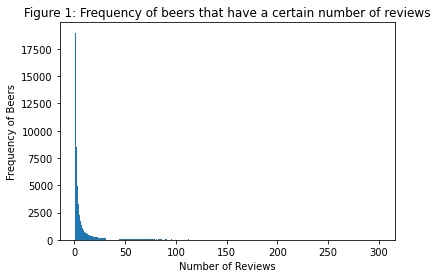

In [ ]:
# plotting the frequency of review counts
min_reviews = 1       # start from 1
max_reviews = 300     # not more than 3290
x = review_beer_frequncy.values
y = np.bincount(x, minlength= x.shape[0])
x = range(x.shape[0])
plt.bar(x[min_reviews:max_reviews+1],y[min_reviews:max_reviews+1])
plt.title('Figure 1: Frequency of beers that have a certain number of reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency of Beers')
plt.show()

In [ ]:
# query number of reviews per beer
query1 = df.groupby('beer_name').beer_name.count()\
       .reset_index(name='review_count')
# remove those below the threshold
query1 = query1.query("review_count >= " + str(threshold))
# find mean, std, min, max, count of reviews for each beer
query2 = df.loc[df['beer_name'].isin(query1.beer_name)].groupby('beer_name')\
         .review_overall.agg(['mean', 'std','min','max','count'])\
         .sort_values('mean', ascending= False)
# show those which have average review more than 4.5 and sort based on #reviews
query2.query('mean >= 4.5').sort_values('count', ascending= False)

,mean,std,min,max,count
beer_name,,,,,
Pliny The Elder,4.593544,0.453275,1.0,5.0,2432
Weihenstephaner Hefeweissbier,4.515625,0.466331,1.5,5.0,1952
Trappist Westvleteren 12,4.617925,0.441112,2.0,5.0,1272
Trappist Westvleteren 8,4.514144,0.452188,3.0,5.0,707
Founders CBS Imperial Stout,4.592233,0.432180,2.0,5.0,618
Pliny The Younger,4.597973,0.473168,2.5,5.0,592
Heady Topper,4.618510,0.363891,3.5,5.0,443
Portsmouth Kate The Great,4.544048,0.541665,2.0,5.0,420


## Question 3

Which of the factors (aroma, taste, appearance, palette) are most important in
determining the overall quality of a beer?

A good approach to check the correlation between these factors and the overall_review. The most correlated factor is the most important. Based on the following query, the answer would be **taste**.


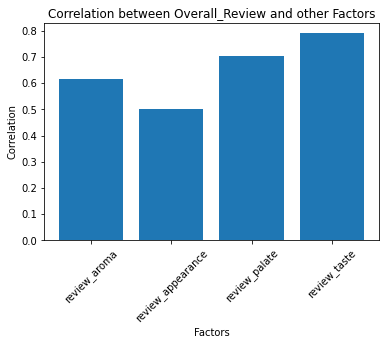

In [ ]:
# find the correlation matrix
query = df[['review_overall', 'review_aroma', 'review_appearance',
            'review_palate', 'review_taste']].corr()
plt.bar(query.index[1:5], query['review_overall'][1:5])
plt.xticks(rotation=45)
plt.ylabel('Correlation')
plt.xlabel('Factors')
plt.title('Correlation between Overall_Review and other Factors')
plt.show()

## Question 4

Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

To make a decision, we create an indicator called **aroma\*appearance**, which is equal to the multiplication of aroma and appearance values. The beer style with the highest **aroma\*appearance** and number of reviews is the best. 

By looking at the two tables below, it turns out there is no beer style that has the highest **aroma\*appearance** and number of reviews. Therefore, we can pick the top three beer styles. Although "Quadrupel (Quad)" has a good review but its number of reviews is not as much as the following beer styles. All of them are in the top 5 of both tables.


1.   **American Double / Imperial IPA**
2.   **Russian Imperial Stout**
3.   **American Double / Imperial Stout**



In [ ]:
# add a decision indicator
df['aroma*appearance'] = df.review_aroma * df.review_appearance
# query number of reviews per beer style
query1 = df.groupby('beer_style').beer_style.count()\
       .reset_index(name='review_count')
# find mean and count of our indicator for each beer style
query2 = df.loc[df['beer_style'].isin(query1.beer_style)].groupby('beer_style')\
         ['aroma*appearance'].agg(['mean','count'])
# filter those with score of 20 and above and sort based on count
print('Maximum value for our indicator:', query2['mean'].max())
print()
print('Top 5 beer styles with the highest indicator')
print(query2.query('mean >= 16').sort_values('count' , ascending= False).head())
print()
print('Top 5 beer styles with the highest review counts')
print(query2.query('mean >= 16').sort_values('mean' , ascending= False).head())

Maximum value for our indicator: 17.41038563538115

Top 5 beer styles with the highest indicator
                                       mean  count
beer_style                                        
American Double / Imperial IPA    16.796814  84686
Russian Imperial Stout            17.252843  53555
American Double / Imperial Stout  17.410386  50151
Belgian Strong Dark Ale           16.018513  37514
American Strong Ale               16.134930  31620

Top 5 beer styles with the highest review counts
                                       mean  count
beer_style                                        
American Double / Imperial Stout  17.410386  50151
Russian Imperial Stout            17.252843  53555
Quadrupel (Quad)                  17.139372  17995
American Double / Imperial IPA    16.796814  84686
Gueuze                            16.734328   5982
